# Comparison between two feature selection algorithm (RFE and Kbest) in classifying diabetes with random forest.

Machine Learning for classifying diabetes from patient's health related characteristics. Classification is done with random forest algorithm. Two feature selection algorithm is used (RFE & Kbest) to compare which has the better performance. Dataset used can be found on kaggle: https://www.kaggle.com/datasets/prosperchuks/health-dataset/data



Data Cleaning > Splitting 80 20 > Quantile Training (Export Model for Testing) > Normalization Training (Export Model for Testing) > Feature Selection + Model Training (Export Model for Testing)

By Brandon Ogaden

In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
import pickle
import gzip
import joblib

In [ ]:
df = pd.read_csv("diabetes_data.csv")
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(70692, 18)

In [ ]:
df.dtypes

Age                     float64
Sex                     float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Stroke                  float64
HighBP                  float64
Diabetes                float64
dtype: object

# Preprocessing

## Cleaning

In [ ]:
df.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
70687    False
70688    False
70689    False
70690    False
70691    False
Length: 70692, dtype: bool

Tidak ada data yang kosong atau duplikat

## Data Splitting

In [ ]:
x = df.drop(['Diabetes'],axis = 1)
y = df['Diabetes']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
X_train['Diabetes'] = y_train
df = X_train.copy()

In [ ]:
#EXPORT DATA TEST (TANPA TARGET)
X_test.to_csv("data_test.csv", index = False)
#EXPORT DATA TRAIN
df.to_csv("data_train.csv", index = False)

In [ ]:
df.shape

(56553, 18)

In [ ]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
61789,11.0,1.0,0.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,3.0,0.0,0.0,1.0,1.0
46280,11.0,0.0,1.0,1.0,27.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,30.0,1.0,0.0,1.0,1.0
18465,8.0,0.0,0.0,1.0,27.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,10.0,27.0,1.0,0.0,1.0,0.0
45540,12.0,0.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
28119,5.0,0.0,1.0,1.0,26.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,2.0,1.0,0.0,1.0,0.0


In [ ]:
X_test.shape

(14139, 17)

## Outlier Removal


In [ ]:
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot

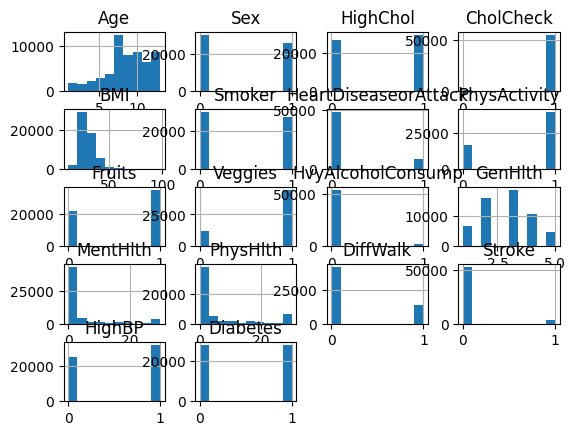

In [ ]:
df.hist()
pyplot.show()

In [ ]:
quantile = QuantileTransformer(output_distribution='normal')

In [ ]:
df_quantile = quantile.fit_transform(df)

In [ ]:
df_quantile_hasil = DataFrame(df_quantile)

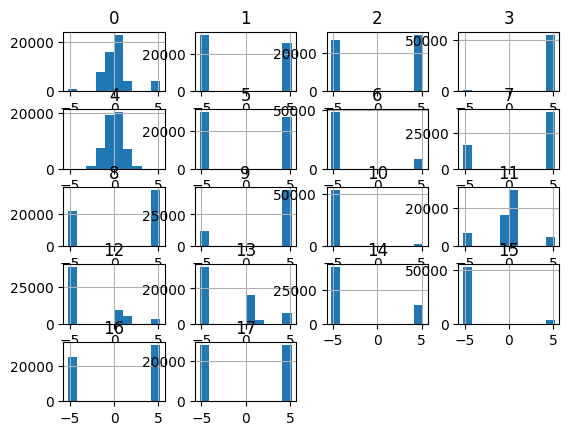

In [ ]:
df_quantile_hasil.hist()
pyplot.show()

In [ ]:
df_quantile_hasil.columns =['Age',	'Sex', 'HighChol', 'CholCheck',	'BMI',	'Smoker',	'HeartDiseaseorAttack',	'PhysActivity',	'Fruits', 'Veggies', 'HvyAlcoholConsump',	'GenHlth',	'MentHlth',	'PhysHlth',	'DiffWalk',	'Stroke',	'HighBP', 'Diabetes']

In [ ]:
df_quantile_hasil = df_quantile_hasil.round(2)

In [ ]:
df_quantile_hasil.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,0.80,5.2,-5.2,5.2,-0.70,-5.2,-5.2,5.2,-5.2,5.2,-5.2,0.95,-5.20,0.49,-5.2,-5.2,5.2,5.2
1,0.80,-5.2,5.2,5.2,-0.29,5.2,5.2,-5.2,-5.2,-5.2,-5.2,5.20,-5.20,5.20,5.2,-5.2,5.2,5.2
2,-0.32,-5.2,-5.2,5.2,-0.29,5.2,-5.2,5.2,-5.2,-5.2,-5.2,0.95,1.13,1.20,5.2,-5.2,5.2,-5.2
3,1.20,-5.2,5.2,5.2,-0.70,-5.2,-5.2,5.2,-5.2,-5.2,-5.2,0.17,-5.20,-5.20,-5.2,-5.2,-5.2,5.2
4,-1.14,-5.2,5.2,5.2,-0.50,5.2,-5.2,5.2,-5.2,-5.2,5.2,0.17,-5.20,0.36,5.2,-5.2,5.2,-5.2


In [ ]:
#EXPORT QUANTILE AS PKL

with open('quantile.pkl', 'wb') as file:
   pickle.dump(quantile, file)

## Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
df_normalization = scaler.fit_transform(df_quantile_hasil)

In [ ]:
df_normalization_hasil = DataFrame(df_normalization.round(2))

In [ ]:
df_normalization_hasil.columns =['Age',	'Sex', 'HighChol', 'CholCheck',	'BMI',	'Smoker',	'HeartDiseaseorAttack',	'PhysActivity',	'Fruits', 'Veggies', 'HvyAlcoholConsump',	'GenHlth',	'MentHlth',	'PhysHlth',	'DiffWalk',	'Stroke',	'HighBP', 'Diabetes']

In [ ]:
df_normalization_hasil.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,0.58,1.0,0.0,1.0,0.43,0.0,0.0,1.0,0.0,1.0,0.0,0.59,0.00,0.55,0.0,0.0,1.0,1.0
1,0.58,0.0,1.0,1.0,0.47,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,1.00,1.0,0.0,1.0,1.0
2,0.47,0.0,0.0,1.0,0.47,1.0,0.0,1.0,0.0,0.0,0.0,0.59,0.61,0.62,1.0,0.0,1.0,0.0
3,0.62,0.0,1.0,1.0,0.43,0.0,0.0,1.0,0.0,0.0,0.0,0.52,0.00,0.00,0.0,0.0,0.0,1.0
4,0.39,0.0,1.0,1.0,0.45,1.0,0.0,1.0,0.0,0.0,1.0,0.52,0.00,0.53,1.0,0.0,1.0,0.0


In [ ]:
# EXPORT NORMALIZATION AS PKL

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Machine Learning

## Initialization

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
n = 8 #Jumlah fitur yang ingin di ekstraksi

In [ ]:
x = df_normalization_hasil.drop(['Diabetes'],axis=1)
y = df_normalization_hasil['Diabetes']

In [ ]:
y.head()

0    1.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: Diabetes, dtype: float64

## Random Forest w/ RFE

In [ ]:
model = RandomForestClassifier()

In [ ]:
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=n)

In [ ]:
pipe = Pipeline([('Feature Selection', rfe), ('Model', model)])

In [ ]:
pipe.fit(x, y)

Pipeline(steps=[('Feature Selection',
                 RFE(estimator=RandomForestClassifier(),
                     n_features_to_select=8)),
                ('Model', RandomForestClassifier())])

In [ ]:
rf_df = pd.DataFrame(rfe.ranking_,index=x.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)

In [ ]:
rf_df.head(17)

,Rank
Age,1
DiffWalk,1
PhysHlth,1
MentHlth,1
GenHlth,1
HighBP,1
BMI,1
HighChol,1
Fruits,2
Smoker,3


In [ ]:
# EXPORT MODEL AS PKL

with open('RFRFE.pkl', 'wb') as file:
    pickle.dump(pipe, file)

In [ ]:
# COMPRESSED MODEL
with open('ComRFRFE.pkl', 'wb') as file:
  joblib.dump(pipe, file, compress=3)


## Random Forest w/ KBest

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
model2 = RandomForestClassifier()

In [ ]:
kbest = SelectKBest(score_func=chi2, k=n)

In [ ]:
pipe2 = Pipeline([('Feature Selection', kbest), ('Model', model2)])

In [ ]:
pipe2.fit(x, y)

Pipeline(steps=[('Feature Selection',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x7eb4a03396c0>)),
                ('Model', RandomForestClassifier())])

In [ ]:
KB_df = pd.DataFrame(kbest.scores_,index=x.columns,columns=['Rank']).sort_values(by='Rank',ascending=False)

In [ ]:
KB_df.head(17)

,Rank
HighBP,3621.643610
DiffWalk,3144.028752
HighChol,2222.075669
HeartDiseaseorAttack,2139.956929
PhysHlth,1074.126297
Stroke,811.387740
GenHlth,754.965451
HvyAlcoholConsump,499.554252
PhysActivity,413.456257
Smoker,211.852060


In [ ]:
# EXPORT MODEL AS PKL

with open('RFKBEST.pkl', 'wb') as file:
    pickle.dump(pipe2, file)

## Testing

In [ ]:
quantile1 = pickle.load(open('quantile.pkl', 'rb'))

In [ ]:
X_test = quantile1.fit_transform(X_test)

In [ ]:
scaler1 = pickle.load(open('scaler.pkl', 'rb'))

In [ ]:
X_test = scaler.fit_transform(X_test)

In [ ]:
X_test = DataFrame(X_test.round(2))

In [ ]:
X_test.columns =['Age',	'Sex', 'HighChol', 'CholCheck',	'BMI',	'Smoker',	'HeartDiseaseorAttack',	'PhysActivity',	'Fruits', 'Veggies', 'HvyAlcoholConsump',	'GenHlth',	'MentHlth',	'PhysHlth',	'DiffWalk',	'Stroke',	'HighBP']

In [ ]:
predictions = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
confusion_matrix(y_test, predictions)

array([[4870, 2220],
       [1832, 5217]])

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.73      0.69      0.71      7090
         1.0       0.70      0.74      0.72      7049

    accuracy                           0.71     14139
   macro avg       0.71      0.71      0.71     14139
weighted avg       0.71      0.71      0.71     14139



In [ ]:
predictions2 = pipe2.predict(X_test)

In [ ]:
confusion_matrix(y_test, predictions2)

array([[4644, 2446],
       [1498, 5551]])

In [ ]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

         0.0       0.76      0.66      0.70      7090
         1.0       0.69      0.79      0.74      7049

    accuracy                           0.72     14139
   macro avg       0.73      0.72      0.72     14139
weighted avg       0.73      0.72      0.72     14139



In [ ]:
with open('ComRFRFE.pkl', 'rb') as file:
    compressed = joblib.load(file)

In [ ]:
predictions3 = compressed.predict(X_test)

In [ ]:
confusion_matrix(y_test, predictions3)

array([[4870, 2220],
       [1832, 5217]])

In [ ]:
print(classification_report(y_test, predictions3))

              precision    recall  f1-score   support

         0.0       0.73      0.69      0.71      7090
         1.0       0.70      0.74      0.72      7049

    accuracy                           0.71     14139
   macro avg       0.71      0.71      0.71     14139
weighted avg       0.71      0.71      0.71     14139

